UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL).


    Field description
    Province_State - The name of the State within the USA.
    Country_Region - The name of the Country (US).
    Last_Update - The most recent date the file was pushed.
    Lat - Latitude.
    Long_ - Longitude.
    Confirmed - Aggregated confirmed case count for the state.
    Deaths - Aggregated Death case count for the state.
    Recovered - Aggregated Recovered case count for the state.
    Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
    FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
    Incident_Rate - confirmed cases per 100,000 persons.
    People_Tested - Total number of people who have been tested.
    People_Hospitalized - Total number of people hospitalized.
    Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
    UID - Unique Identifier for each row entry.
    ISO3 - Officialy assigned country code identifiers.
    Testing_Rate - Total number of people tested per 100,000 persons.
    Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.



In [1]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
covidData=pd.read_csv('csse_covid_19_daily_reports_us.txt')
covidData


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
covidData.dtypes

Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [4]:
covidData['ISO3'].unique()

array(['USA', 'ASM', 'GUM', 'MNP', 'PRI', 'VIR'], dtype=object)

In [5]:
covidData.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [6]:
# Recovered =Confirmed-Detahs-Active

covidData['Recovered']= covidData['Recovered'].fillna(covidData['Confirmed'].astype(float)-(covidData['Deaths']+covidData['Active']).astype(float))

In [7]:
covidData['People_Hospitalized']= covidData['People_Hospitalized'].fillna(covidData['Confirmed'].astype(float).mean())

In [8]:
# Total number of people hospitalized * 100/ Number of confirmed cases.

covidData['Hospitalization_Rate']= covidData['Hospitalization_Rate'].fillna(covidData['Confirmed'] if covidData['Confirmed'].min()==0  else  covidData['People_Hospitalized']*100/covidData['Confirmed']) 



In [9]:
# Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
covidData['Mortality_Rate']= covidData['Mortality_Rate'].fillna(0 if covidData['Confirmed'].min()==0  else (covidData['Deaths']*100)/covidData['Confirmed']) 


In [10]:
# Testing_Rate - Total number of people tested per 100,000 persons
covidData['Testing_Rate']= covidData['Testing_Rate'].fillna(0 if covidData['Confirmed'].min()==0  else covidData['People_Tested']/100000) 


In [11]:
# People_Tested =Confirmed

covidData['People_Tested']= covidData['People_Tested'].fillna(covidData['Confirmed'].astype(float))

In [12]:
# Incident_Rate - confirmed cases per 100,000 persons.
covidData['Incident_Rate']= covidData['Incident_Rate'].fillna(0 if covidData['Confirmed'].min()==0  else covidData['Confirmed']/100000) 


In [13]:


covidData.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     2
Long_                   2
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [14]:
# Dropping the constant values 
covidData.drop(['Country_Region','Last_Update','Lat','Long_'],axis=1,inplace=True)

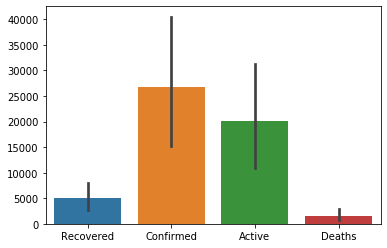

In [15]:
# Total 
sns.barplot( data=covidData[['Recovered','Confirmed','Active','Deaths']])

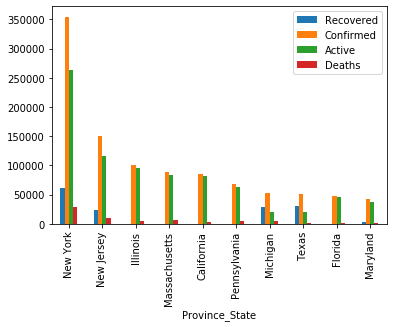

In [16]:
# Top 10 Confirmed States
covidData[['Recovered','Confirmed','Active','Province_State','Deaths']].sort_values(by='Confirmed', ascending=False).head(10).plot.bar(x="Province_State")


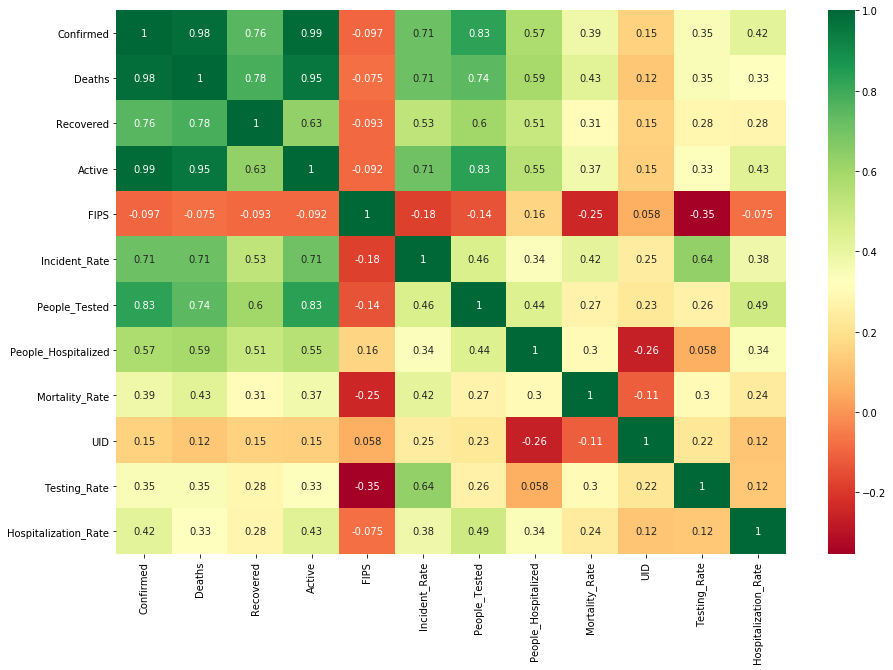

In [17]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=covidData.corr(),annot=True,cmap="RdYlGn")

In [18]:
# Dropping the negative correlations 
covidData.drop(['FIPS'],axis=1,inplace=True)

In [20]:
# handling catagorical variables


# covidData = pd.get_dummies(covidData, columns = ['Province_State'], drop_first = True)
# covidData = pd.get_dummies(covidData, columns = ['ISO3'], drop_first = True) 

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
covidData['Province_State'] = labelencoder.fit_transform(covidData['Province_State'])
covidData['ISO3'] = labelencoder.fit_transform(covidData['ISO3'])

In [22]:
covidData

,Province_State,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,13052,522,0.0,12530.0,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,401,10,352.0,39.0,54.815493,37045.0,26756.086207,2.493766,84000002,4,5063.940017,401.000000
2,2,0,0,0.0,0.0,0.000000,124.0,26756.086207,0.000000,16,0,222.857246,0.000000
3,3,14906,747,3773.0,10386.0,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,5003,107,3852.0,1044.0,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584
5,5,85997,3497,0.0,82500.0,217.646575,1380120.0,26756.086207,4.066421,84000006,4,3492.893832,85997.000000
6,6,22797,1299,3478.0,18020.0,395.868121,131837.0,3955.000000,5.698118,84000008,4,2289.339188,17.348774
7,7,39017,3529,6264.0,29224.0,1094.357902,190718.0,10946.000000,9.044775,84000009,4,5349.302875,28.054438
8,8,8194,310,3965.0,3919.0,841.476990,45412.0,26756.086207,3.783256,84000010,4,4663.552976,8194.000000
9,9,49,0,0.0,49.0,0.000000,49.0,26756.086207,0.000000,84088888,4,0.000000,49.000000


In [23]:
x=covidData.drop(['ISO3'],axis=1)
x.shape

(58, 12)

In [24]:
y=covidData['ISO3']
y=np.array(y).reshape(-1,1)

In [25]:
x.skew()

Province_State          0.000000
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.649556
Active                  4.180953
Incident_Rate           1.961954
People_Tested           2.812257
People_Hospitalized     1.296299
Mortality_Rate          0.400879
UID                    -3.027480
Testing_Rate            1.024775
Hospitalization_Rate    3.298798
dtype: float64

In [26]:
# Log Trasformation

x=np.log(x+1)


In [27]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [28]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

In [29]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=LinearSVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)

In [39]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("DecisionTreeClassifier",DT))
models.append(("RandomForestClassifier",Rf))


In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
      
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
      
    print('\n\n')
     


*********** KNeighborsClassifier ************


max r2 score corresponding to 44  is  1.0


random state value = 44
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  1.0


Cross_Val_Score= 0.9545454545454545


classification_report
               precision    recall  f1-score   support

           4       1.00      1.00      1.00        13

   micro avg       1.00      1.00      1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13




*********** DecisionTreeClassifier ************


max r2 score corresponding to 44  is  1.0


random state value = 44
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_s

In [41]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs})
result

,Model,Accuracy_score,Cross_val_Score
0,KNeighborsClassifier,100.0,95.454545
1,DecisionTreeClassifier,100.0,95.454545
2,RandomForestClassifier,100.0,95.454545


In [42]:
# Ensemble Techquies to boost the performance 
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
ad_pred=gb.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.8461538461538461
[[ 0  1  0]
 [ 0 11  0]
 [ 0  1  0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.85      1.00      0.92        11
           5       0.00      0.00      0.00         1

   micro avg       0.85      0.85      0.85        13
   macro avg       0.28      0.33      0.31        13
weighted avg       0.72      0.85      0.78        13



In [43]:
# Ensemble Techquies to boost the performance 
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(n_estimators=100)
model.fit(train_x,train_y)
print(model.score(train_x,train_y))

0.9999998600232908


In [45]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(KNN,'Covid19_KNN_Model.obj')
joblib.dump(DT,'Covid19_DT_Model.obj')
joblib.dump(rf,'Covid19_Rf_Model.obj')



['Covid19_Rf_Model.obj']

# Conclusion
    Preparing the classification model for   (ISO3 - Officialy assigned country code identifiers.)
    Null vaules has been replaced 
    we have been applied Log Tranformation for Normal Distribution
    KNeighborsClassifier,DecisionTreeClassifier,RandomForestClassifier Model has been achived max performance
